In [62]:
import numpy as np, random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

In [43]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

In [44]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

 18/313 [>.............................] - ETA: 0s 

2024-01-27 13:07:29.009282: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


 77/313 [======>.......................] - ETA: 0s

313/313 [==============================] - 1s 2ms/step


2024-01-27 13:07:29.977698: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


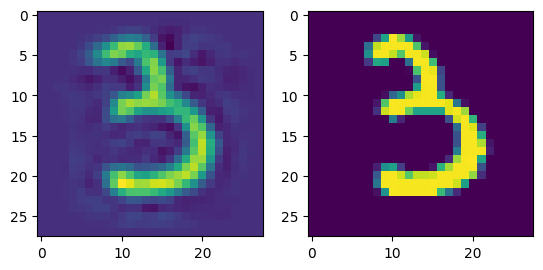

In [67]:
import matplotlib.pyplot as plt
rand = np.random.randint(0, len(reconstructed_images))
random_case = reconstructed_images[rand]
random_case2 = test_images[rand]
img_m = np.reshape(random_case, (28,28))
img_m2 = np.reshape(random_case2, (28,28))

plt.subplot(1, 2, 1)  
plt.imshow(img_m)

plt.subplot(1, 2, 2)
plt.imshow(img_m2)

plt.show()

### MSE

In [46]:
mse = [0] * len(test_images)
for i in range(len(test_images)):
    for j in range(len(test_images[i])):
        mse[i] += (test_images[i][j] - reconstructed_images[i][j]) ** 2

In [47]:
for i in range(len(mse)):
    mse[i] /= len(test_images[i])

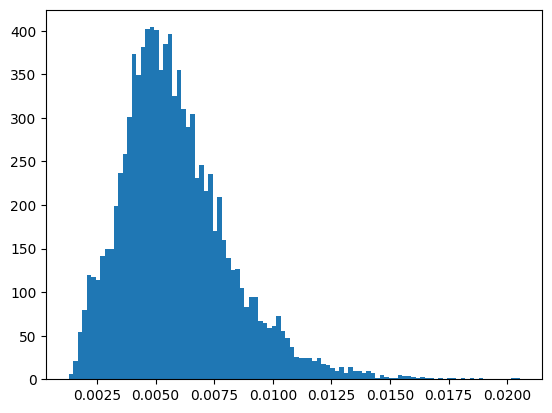

In [48]:
_ = plt.hist(mse, bins=100)

### mean and var

In [49]:
import statistics as st

In [50]:
m_v_mse = (np.mean(mse), np.std(mse))

In [51]:
m_v_mse

(0.00587503899792776, 0.0023322004660511044)

In [59]:
from scipy import stats
ks_statistic, p_value = stats.kstest(mse, cdf='norm', args=(m_v_mse[0],m_v_mse[1]))

In [58]:
p_value

4.538477997819536e-43

In [54]:
ks_statistic, p_value = stats.kstest(mse, stats.norm.cdf)

In [55]:
p_value

0.0

In [56]:
x = stats.norm.rvs(size=10000)

stats.kstest(x, stats.norm.cdf)

KstestResult(statistic=0.005293475929091462, pvalue=0.9406004984084371, statistic_location=0.07047820393807326, statistic_sign=-1)